In [1]:
import numpy as np
import matplotlib.pyplot as plt


Linear Regression

Iteration: 0, Loss: 44.33769495843826
Iteration: 100, Loss: 1.6966142412916303
Iteration: 200, Loss: 1.6167665689139503
Iteration: 300, Loss: 1.598922340626746
Iteration: 400, Loss: 1.5949959668396887
Iteration: 500, Loss: 1.594138570512652
Iteration: 600, Loss: 1.593952209529028
Iteration: 700, Loss: 1.5939118219731359
Iteration: 800, Loss: 1.5939030818691162
Iteration: 900, Loss: 1.5939011917404386


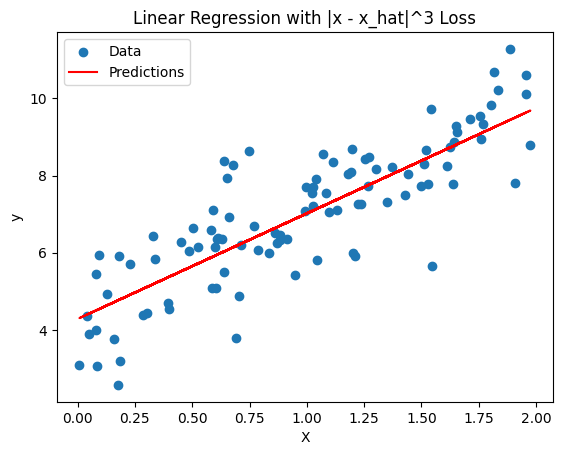

array([[4.28544835],
       [2.73282901]])

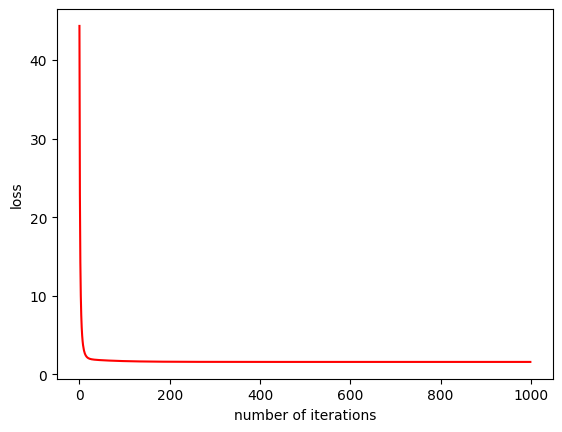

In [3]:

# Generate random data
rng=np.random.RandomState(10)
X = 2 * rng.rand(100, 1)
y = 4 + 3 * X + rng.randn(100, 1)
n=X.shape[0]
# Add bias term to X
X_b = np.c_[np.ones((100, 1)), X]
# Initialize parameters for linear regression
theta = np.random.randn(2, 1)

# Define the loss function and its gradient
def loss_function(X, y, theta):
    predictions = np.dot(X, theta)
    loss = np.mean(np.abs(y - predictions) ** 3)
    return loss

def loss_gradient(X, y, theta):
    predictions = np.dot(X, theta)
    error = predictions - y
    gradient = 3 * np.mean(np.abs(error) ** 2 * np.sign(error) * X, axis=0)
    return gradient.reshape(-1, 1)

# Hyperparameters
learning_rate = 0.01
n_iterations = 1000

# Gradient Descent
L=[]
for iteration in range(n_iterations):
    gradients = loss_gradient(X_b, y, theta)
    theta -= learning_rate * gradients
    cost = loss_function(X_b, y, theta)
    L.append(cost)

    if iteration % 100 == 0:
        cost = loss_function(X_b, y, theta)
        print(f"Iteration: {iteration}, Loss: {cost}")
     

# Predictions
y_predictions = X_b.dot(theta)

# Plotting
plt.scatter(X, y, label='Data')
plt.plot(X, y_predictions, color='red', label='Predictions')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Linear Regression with |x - x_hat|^3 Loss')
plt.show()
plt.plot(L,'r')
plt.xlabel("number of iterations")
plt.ylabel("loss")

theta


[4.24963579]
[[2.81740108]]


Text(0, 0.5, 'y')

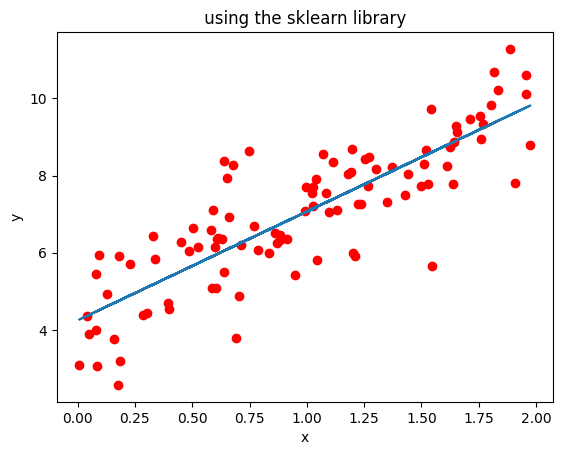

In [4]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X,y)
print(regressor.intercept_)
print(regressor.coef_)
plt.plot(X,y,"ro")
plt.plot(X,X*regressor.coef_+regressor.intercept_)
plt.title(" using the sklearn library ")
plt.xlabel("x")
plt.ylabel("y")


Polynomial Regression

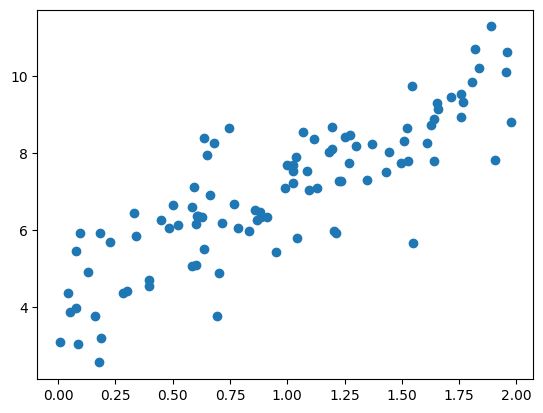

In [22]:

rng=np.random.RandomState(10)
x = 2.0 * rng.rand(100, 1)
#x = np.float256(x)
y = 4.0 + 3.0 *x + rng.randn(100, 1)
#y = np.float256(y)
plt.scatter(x, y)
n=x.shape[0]
x=(x-np.mean(x))/(np.max(x)-np.min(x))
y=(y-np.mean(y))/(np.max(y)-np.min(y))

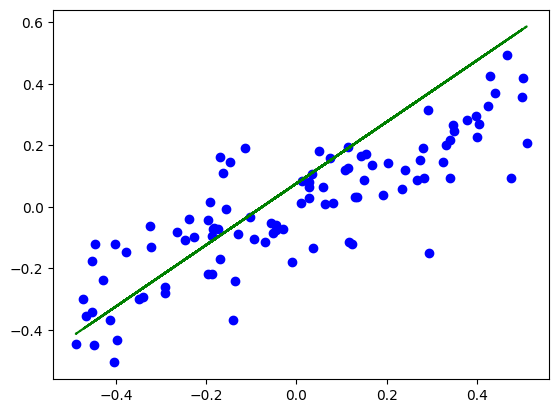

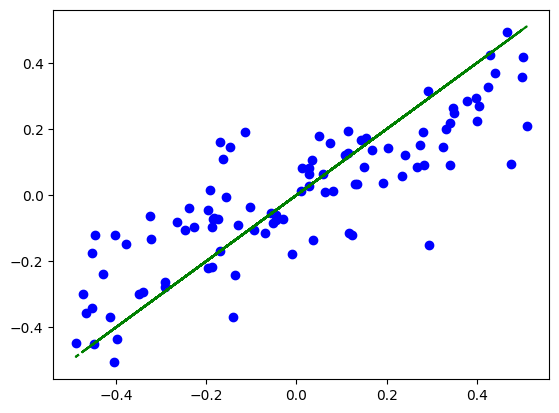

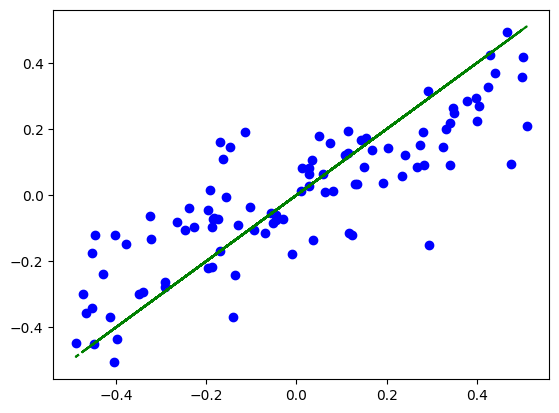

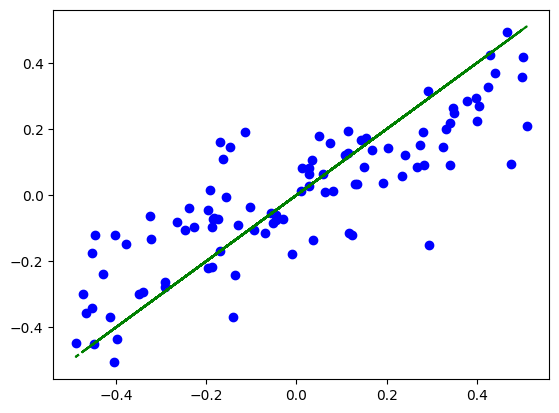

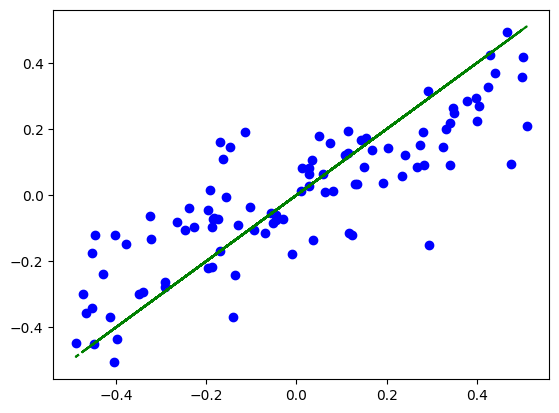

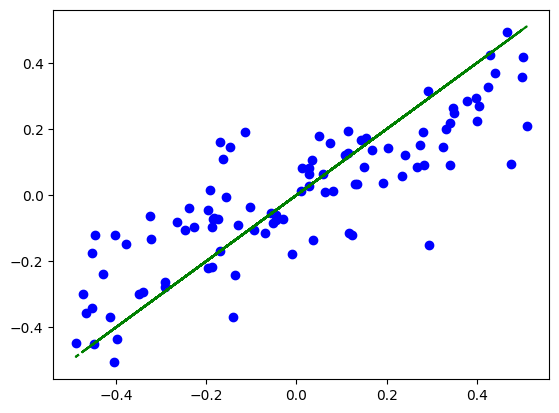

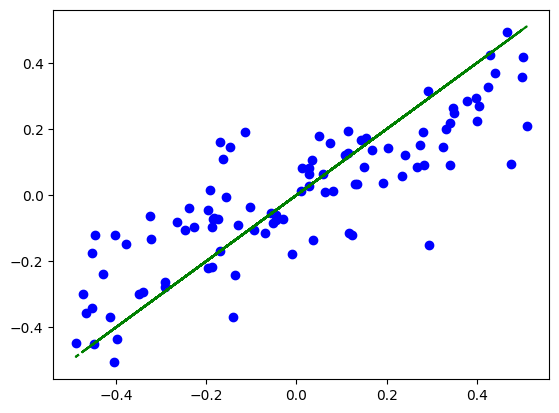

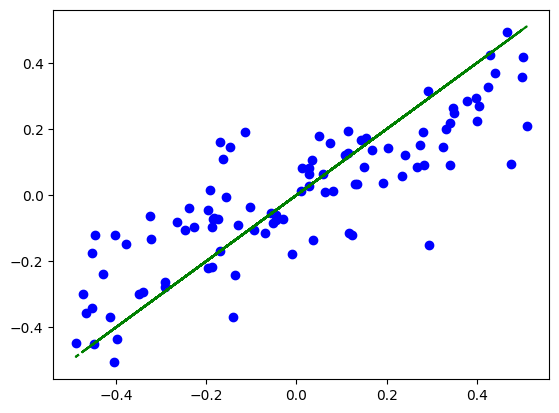

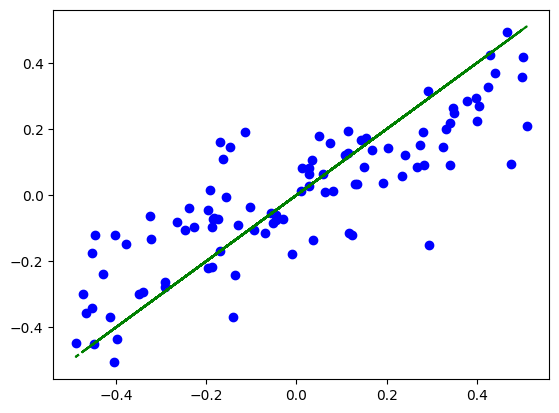

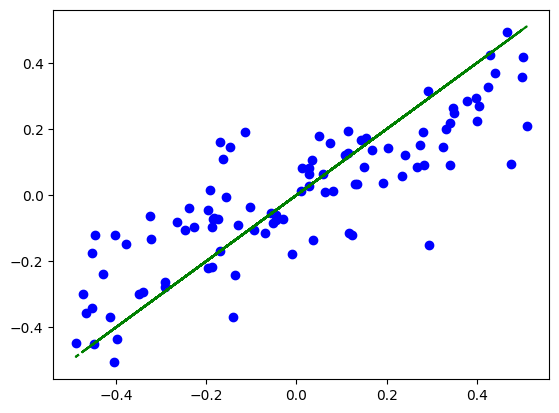

Obtained value of bo: [0.0100047]
Obtained value of b1: [0.00999681]
Obtained value of b2: [0.00998892]
Obtained line: y=[0.00998892]x**2+[0.00999681]x+[0.0100047]


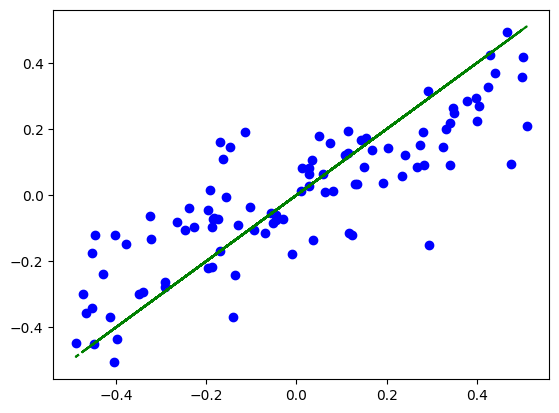

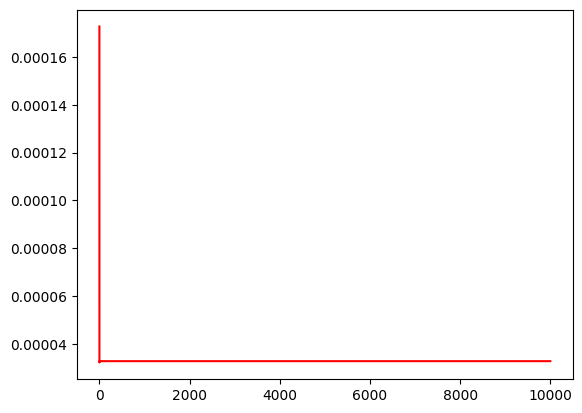

In [49]:
#cost function
def cost_fn(y_hat, y):
    l =(y_hat - y) ** 7
    cost = l.mean()
    return cost

#hypothesis function
def hyp(bo,b1,b2,x):
    return bo+ b1*x+ b2*(x**2)

#gradient descent
def grad_desc(x,y,learn_rate,bo,b1,b2,n):
   y_hat=hyp(bo,b1,b2,x)
   dbo = (7.0/n)*(np.sum(np.multiply(x,(y_hat-y)**6)))
   db1 =(7.0/n)*(np.sum(np.abs((y_hat-y)**6)*x))
   db2 =(7.0/n)*(np.sum(np.abs((y_hat-y)**6)*(x**2)))
  
   bo = bo -learn_rate * dbo
   b1 = b1 -learn_rate * db1
   b2 = b2 -learn_rate * db2
 
   return bo,b1,b2

#Implementation

#random initialization of w,b
bo=np.random.randn(1)
b1=np.random.randn(1)
b2=np.random.randn(1)
#hyperparameter
learn_rate=0.01
num_iteration=10000
L=[]
for i in range(num_iteration):
    bo,b1,b2 = grad_desc(x,y,bo,b1,b2,learn_rate,n)
    y_hat = hyp(x,bo,b1,b2)
    L.append(cost_fn(y_hat,y))
    if (i%(num_iteration/10))==0:
        plt.plot(x,y,'bo')
        plt.plot(x,y_hat,'g--')
        plt.show()       
print(f"Obtained value of bo: {bo}")
print(f"Obtained value of b1: {b1}")
print(f"Obtained value of b2: {b2}")
print(f"Obtained line: y={b2}x**2+{b1}x+{bo}")
plt.plot(x,y,'bo')
plt.plot(x,y_hat,'g--')
plt.show()        
plt.plot(L,'r')
plt.show()






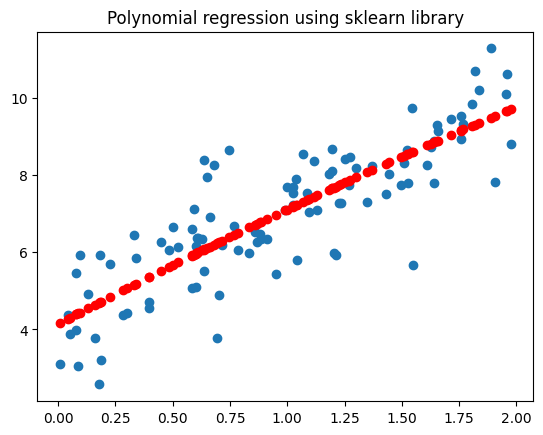

R2 score: {0.7122753983776482}


In [7]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
rng = np.random.RandomState(10)
X = 2 * rng.rand(100, 1)
y = 4 + 3 * X + rng.randn(100, 1)

polynom = PolynomialFeatures(degree=2, include_bias=False)
x_polynom = polynom.fit_transform(X)

polyreg = LinearRegression()
polyreg.fit(x_polynom, y)

plt.scatter(X, y)
plt.scatter(X, polyreg.predict(x_polynom),color="red")  # Use x_polynom for prediction
plt.title("Polynomial regression using sklearn library")
plt.show()
y_pred=polyreg.predict(polynom.fit_transform(X))
from sklearn import metrics
r_square=metrics.r2_score(y,y_pred)
print("R2 score:",{r_square})